**A. Chairs and Tables Shop**

Shop manufactures two types of furniture: chairs and tables.

**Objective:** to maximize weekly profit ( Objective = Value ). ( 20 EUR of profit per chair, 30 EUR of profit per table )

A chair requires 1 hour of finishing labor and 2 hours of carpentry labor.

A table requires 2 hours of finishing labor and 1 hour of carpentry labor.

Each week, Shop has only 100 finishing hours and 100 carpentry hours available.

x1 - number of chairs produced each week

x2 - number of tables produced each week

PuLP uses LP solvers (GLPK, COIN CLP/CBC, CPLEX, and GUROBI) to solve linear problems

In [2]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 59.0 MB/s eta 0:00:00


In [3]:
# Import PuLP modeler functions
from pulp import *

In [65]:
# Create a LP maximization problem
# prob = weekly total profit
prob = LpProblem("Furniture Shop", LpMaximize)

In [66]:
# LpVariable(variable name, lower Bound=None, uppper Bound=None, catagory='Continuous')
x1 = LpVariable("x1", lowBound=0) # Chairs, Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0) # Tables, Create another variable x2 >= 0

In [67]:
# Objective Function ( x1 chairs, x2 tables)
prob += 20*x1 + 30*x2
# prob += 20*x1 + 30*x2, "obj"

In [68]:
# Constraints
prob += 1*x1 + 2*x2 <= 100  # Finishing hours
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours

# prob += 1*x1 + 2*x2 <= 100,"Finishing hours"
# prob += 2*x1 + 1*x2 <= 100,"Carpentry hours"

In [69]:
# Display the LP problem
prob

Furniture_Shop:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
x1 Continuous
x2 Continuous

**There are 5 status solver codes:**

Not Solved: Status prior to solving the problem.

Optimal: An optimal solution has been found.

Infeasible: There are no feasible solutions (e.g. if you set the constraints x <= 1 and x >=2).

Unbounded: The constraints are not bounded, maximising the solution will tend towards infinity (e.g. if the only constraint was x >= 3).

Undefined: The optimal solution may exist but may not have been found.

In [9]:
# Solve with the default solver
prob.solve()

1

In [10]:
# Print the solution status

print("Status:", LpStatus[prob.status])

Status: Optimal


In [11]:
# Show the solution (1st Approach), maximised weekly profit is 1666 EUR
# To achieve maximised weekly profit 1666 EUR, shop should produce 33 chairs per week and 33 tables per week.
value(x1), value(x2), value(prob.objective)

(33.333333, 33.333333, 1666.6666500000001)

In [12]:
# Show the solution (2nd Approach), maximised weekly profit is 1666 EUR
for v in prob.variables():
    print (v.name, "=", v.varValue, "\tReduced Cost =", v.dj)

x1 = 33.333333 	Reduced Cost = -0.0
x2 = 33.333333 	Reduced Cost = -0.0


In [13]:
print ("objective=", value(prob.objective))

objective= 1666.6666500000001


Shadow price - indicates how much the optimal objective function value would change if the right-hand side (RHS) of a constraint increased by one unit. Lower shadow prices could indicate solutions that are more favorable when such constraints change afterwards.

Slack - the amount by which a constraint is not binding, meaning the constraint is not fully utilized.

When a constraint is binding (slack = 0), the shadow price is non-zero and reflects the marginal value of the resource.
When a constraint is non-binding (slack > 0), the shadow price is typically zero, as further increases in the resource would not affect the optimal solution.

In [14]:
print ("\nSensitivity Analysis\nConstraint\t\tShadow Price\tSlack")
for name, c in prob.constraints.items():
    print (name, ":", c, "\t", c.pi, "\t\t", c.slack)


Sensitivity Analysis
Constraint		Shadow Price	Slack
_C1 : x1 + 2*x2 <= 100 	 13.333333 		 -0.0
_C2 : 2*x1 + x2 <= 100 	 3.3333333 		 -0.0


**B. Fashion Shop**

Shop manufactures 3 types of Jacket: white, beige and grey.

**Objective:** to maximize weekly profit ( Objective = Value ).
 ( 10 EUR cost per white jacket, 12 EUR cost per beige jacket, 11 EUR cost per grey jacket )


PuLP uses LP solvers (GLPK, COIN CLP/CBC, CPLEX, and GUROBI) to solve linear problems

In [53]:
# Import PuLP modeler functions
from pulp import *

In [70]:
# Create a LP maximization problem
prob = LpProblem("Fashion Shop", LpMaximize)

In [71]:
# LpVariable(variable name, lower Bound=None, uppper Bound=None, catagory='Continuous')
x1 = LpVariable("x1",0,None,LpContinuous) # White Jackets: Create a variable x1 >= 0
x2 = LpVariable("x2",0,None,LpContinuous) # Beige Jackets: Create another variable x2 >= 0
x3 = LpVariable("x3",0,None,LpContinuous) # Grey Jackets: Create another variable x3 >= 0

In [72]:
# Objective Function
prob += 10*x1 + 12*x2 + 11*x3

In [73]:
# Define the Constraints, Be sure to sell at least 1 beige Jacket and at least 1 grey jacket to diversify the porfolio
# Over the fact the white Jacket costs are the smallest
prob += 1*x1 + 2*x2 + 3*x3 <= 10 # to sell max 10 jackets
prob += 0*x1 + 1*x2 + 2*x3 <= 5  # to sell max max 5 beige or grey
prob += 1*x1 >= 1.0 # to sell minimum 1 white
prob += 1*x2 >= 1.0 # to sell minimum 1 beige
prob += 1*x3 >= 1.0 # to sell minimum 1 grey

In [74]:
# Display the LP problem
prob

Fashion_Shop:
MAXIMIZE
10*x1 + 12*x2 + 11*x3 + 0
SUBJECT TO
_C1: x1 + 2 x2 + 3 x3 <= 10

_C2: x2 + 2 x3 <= 5

_C3: x1 >= 1

_C4: x2 >= 1

_C5: x3 >= 1

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

In [75]:
# Solve with the default solver
prob.solve()

1

In [76]:
# Print the solution status
print("Status:", LpStatus[prob.status])

Status: Optimal


In [78]:
# Show the solution (1st Approach)
# Pulp recommends to sell 5 white jackets, 1 beige jacket and 1 grey jacket to maximise the profit
# Minimised costs are is 73 EUR ( 5 * 10 EUR + 12 EUR + 11 EUR )
value(x1), value(x2), value(x3), value(prob.objective)

(5.0, 1.0, 1.0, 73.0)

In [79]:
# Show the solution (2nd Approach)
for v in prob.variables():
    print (v.name, "=", v.varValue, "\tReduced Cost =", v.dj)

x1 = 5.0 	Reduced Cost = 0.0
x2 = 1.0 	Reduced Cost = 0.0
x3 = 1.0 	Reduced Cost = 0.0


In [80]:
print ("objective=", value(prob.objective))

objective= 73.0


In [82]:
print ("\nSensitivity Analysis\nConstraint\t\t\tShadow Price\tSlack")
for name, c in prob.constraints.items():
    print (name, ":", c, "\t", c.pi, "\t", c.slack)


Sensitivity Analysis
Constraint			Shadow Price	Slack
_C1 : x1 + 2*x2 + 3*x3 <= 10 	 10.0 	 -0.0
_C2 : x2 + 2*x3 <= 5.0 	 -0.0 	 2.0
_C3 : x1 >= 1.0 	 -0.0 	 -4.0
_C4 : x2 >= 1.0 	 -8.0 	 -0.0
_C5 : x3 >= 1.0 	 -19.0 	 -0.0


**C. Fashion Shop**

Shop manufactures 2 types of Blazer: white and black.They are delivered in Batches. Each batch has 20 Blazers, ballck blazers are cheaper.

**Objective:** to minimize weekly cost ( Objective = Value ).
 ( 600 EUR cost per white blazer batch, 400 EUR cost per black blazer batch )


PuLP uses LP solvers (GLPK, COIN CLP/CBC, CPLEX, and GUROBI) to solve linear problems

In [111]:
from pulp import *
import matplotlib.pyplot as plt
import numpy as np

In [112]:
# Create an object of a model
prob = LpProblem("Simple LP Problem", LpMinimize)

In [113]:
# Define the decision variables
x1 = LpVariable("x1", 0) # white blazer batch
x2 = LpVariable("x2", 0) # black blazer batch

In [103]:
# Define the objective function
prob += 600*x1 + 400*x2

In [104]:
# Define the constraints
prob += 4*x1 + 4*x2 >= 10.0, "1st constraint"
prob += 2*x1 + x2 >= 4.0, "2nd constraint"
prob += 6*x1 + 2*x2 <= 12.0, "3rd constraint"

In [105]:
# Solve the linear programming problem
prob.solve()

1

In [106]:
# Print the results
print ("Status: ", LpStatus[prob.status])

Status:  Optimal


In [107]:
# share: white blazers 3 * 1, black blazers 2 * 1
for v in prob.variables():
    print (v.name, "=", v.varValue)

x1 = 1.5
x2 = 1.0


In [108]:
print ("The optimal value of the objective function is = ", value(prob.objective))

The optimal value of the objective function is =  1300.0


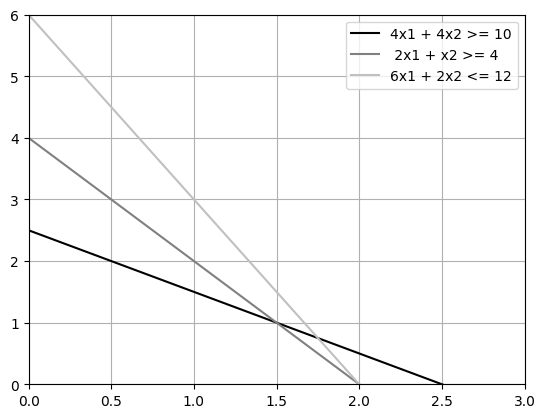

In [115]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10', color="black")
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4', color="grey")
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12', color="silver")

plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

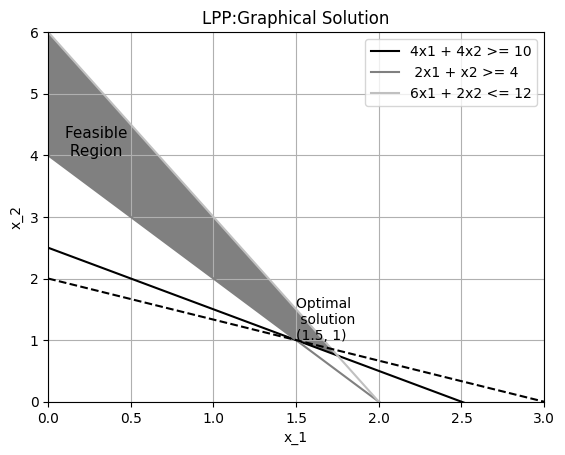

In [117]:
# Plot the optimal solution
x = np.arange(0, 4)
plt.plot(x, 2.5 - x, label = '4x1 + 4x2 >= 10', color="black")
plt.plot(x, 4 - 2 * x, label= ' 2x1 + x2 >= 4', color="grey")
plt.plot(x, 6 - 3 * x, label = '6x1 + 2x2 <= 12', color="silver")
plt.plot(x, 2 - 2/3*x, '--', color="black")

# Define the boundaries of the feasible area in the plot
x = [0, 1.5, 1.75, 0]
y = [4, 1, 0.75, 6]
plt.fill(x, y, 'grey')

plt.text(0.1, 4, 'Feasible \n Region', size = '11')
plt.annotate('Optimal \n solution\n(1.5, 1)', xy = (1.5, 1.0))

plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title('LPP:Graphical Solution')
plt.axis([0, 3, 0, 6])
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# https://pypi.org/project/PuLP/